# **Stock (BBNI) Predictive Modelling**

## **Data Load & Understanding**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
# Connecting Google Drive and Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

# Retrieve the dataset
dataset = '/content/gdrive/MyDrive/Project/Stock Prediction/Data/Cleaned Data/BBNI_Cleaned.csv'
df = pd.read_csv(dataset)

Mounted at /content/gdrive


The data used in the research in this code is data that has been cleaned/pre-processed, so that the existing data is ready to be used in the modeling stage.

In [ ]:
# Display the contents of the dataset as a whole
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,4400.0,4400.0,4400.0,4400.0,3436.901367,0
1,2019-01-01,4400.0,4400.0,4400.0,4400.0,3436.901367,0
2,2019-01-02,4400.0,4400.0,4337.5,4362.5,3407.609375,15681200
3,2019-01-03,4337.5,4387.5,4325.0,4362.5,3407.609375,21416600
4,2019-01-04,4362.5,4400.0,4337.5,4362.5,3407.609375,41078600
...,...,...,...,...,...,...,...
1228,2023-12-21,5225.0,5225.0,5125.0,5150.0,5150.000000,48767200
1229,2023-12-22,5200.0,5250.0,5175.0,5250.0,5250.000000,35234900
1230,2023-12-27,5300.0,5325.0,5250.0,5275.0,5275.000000,31289300
1231,2023-12-28,5300.0,5400.0,5250.0,5350.0,5350.000000,37566900


In [ ]:
# Checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1233 non-null   object 
 1   Open       1233 non-null   float64
 2   High       1233 non-null   float64
 3   Low        1233 non-null   float64
 4   Close      1233 non-null   float64
 5   Adj Close  1233 non-null   float64
 6   Volume     1233 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.6+ KB


In [ ]:
# Check the number of columns and rows in the data
df.shape

(1233, 7)

In [ ]:
# Shows a description of the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1.233000e+03
mean,3754.274128,3796.745742,3705.677210,3750.439984,3339.187703,6.717880e+07
std,903.165238,904.129909,902.960947,904.456984,919.502706,5.236629e+07
min,1580.000000,1705.000000,1485.000000,1580.000000,1375.536499,0.000000e+00
25%,3000.000000,3050.000000,2950.000000,2987.500000,2611.778076,3.548320e+07
50%,3900.000000,3937.500000,3850.000000,3887.500000,3288.142334,5.146580e+07
75%,4512.500000,4550.000000,4475.000000,4512.500000,4082.027100,8.185640e+07
max,5425.000000,5425.000000,5325.000000,5375.000000,5375.000000,4.440854e+08


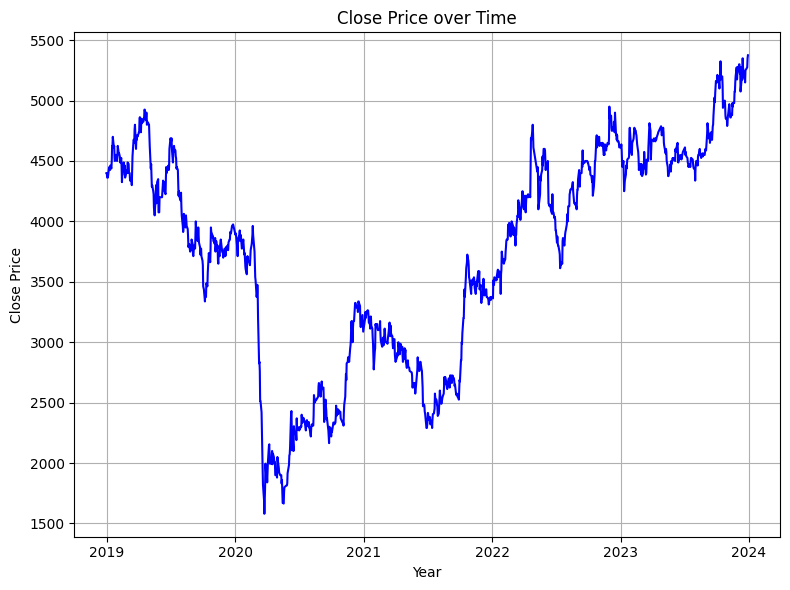

In [ ]:
# Visualize the actual price of the 'Close' attribute by time

# Make sure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Close'], linestyle='-', color='blue')

# Label the x and y axes
plt.xlabel('Year')
plt.ylabel('Close Price')

# Format the x-axis to display only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Chart title
plt.title('Close Price over Time')

# Display the chart
plt.grid(True)
plt.tight_layout()
plt.show()

The visualization is the closing price (close) of JKSE which has been summarized and later predictions will be made to determine the value with several models that will be tried.

## **Data Pre-Processing**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### **Data Splitting**

In [ ]:
training_set = df.iloc[:, 4:5].values #creates a numpy array training_set

In [ ]:
training_set.dtype

dtype('float64')

In [ ]:
training_set

array([[4400. ],
       [4400. ],
       [4362.5],
       ...,
       [5275. ],
       [5350. ],
       [5375. ]])

In [ ]:
training_set.shape

(1233, 1)

### **Normalization (Feature Scaling)**

In [ ]:
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.743083  ],
       [0.743083  ],
       [0.73320158],
       ...,
       [0.97364954],
       [0.99341238],
       [1.        ]])

In [ ]:
training_set_scaled.shape

(1233, 1)

### **Creating Data Structure**

In [ ]:
X_train = training_set_scaled
Y_train = training_set_scaled

# Turning lists into Numpy arrays
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
X_train

array([[0.743083  ],
       [0.743083  ],
       [0.73320158],
       ...,
       [0.97364954],
       [0.99341238],
       [1.        ]])

In [ ]:
X_train.shape

(1233, 1)

### **Reshaping**

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
X_train

array([[[0.743083  ]],

       [[0.743083  ]],

       [[0.73320158]],

       ...,

       [[0.97364954]],

       [[0.99341238]],

       [[1.        ]]])

## **Modelling & Evaluation**

### **Long Short-Term Memory (LSTM)**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#### **Building LSTM Architecture**

In [ ]:
# Creating a LSTM model
lstm_model = Sequential()

# Adding a LSTM layer
lstm_model.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1],1)))
lstm_model.add(Dropout(0.25))
lstm_model.add(LSTM(units = 64, return_sequences = True))
lstm_model.add(Dropout(0.25))
lstm_model.add(LSTM(units = 64, return_sequences = True))
lstm_model.add(Dropout(0.25))
lstm_model.add(LSTM(units = 64, return_sequences = False))
lstm_model.add(Dropout(0.25))
lstm_model.add(Dense(units= 1))

# Compile the LSTM model
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#### **Training LSTM Model**

In [ ]:
# Train the LSTM model
lstm_model.fit(X_train,Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
39/39 [==============================] - 8s 13ms/step - loss: 0.2513
Epoch 2/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0386
Epoch 3/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0256
Epoch 4/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0148
Epoch 5/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0103
Epoch 6/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0080
Epoch 7/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0085
Epoch 8/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0078
Epoch 9/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0067
Epoch 10/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0061
Epoch 11/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0062
Epoch 12/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0052
Epoch 13/100
39/39 [=====

#### **Testing LSTM Model**

In [ ]:
dataset_test = df
real_stock_price = dataset_test.iloc[:,4:5].values
real_stock_price

array([[4400. ],
       [4400. ],
       [4362.5],
       ...,
       [5275. ],
       [5350. ],
       [5375. ]])

In [ ]:
dataset_total = pd.concat((df['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test):].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
inputs

array([[0.743083  ],
       [0.743083  ],
       [0.73320158],
       ...,
       [0.97364954],
       [0.99341238],
       [1.        ]])

In [ ]:
inputs.shape

(1233, 1)

In [ ]:
X_test = inputs
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price_lstm = lstm_model.predict(X_test)
predicted_stock_price_lstm = sc.inverse_transform(predicted_stock_price_lstm)

39/39 [==============================] - 2s 3ms/step


In [ ]:
predicted_stock_price_lstm

array([[4387.818 ],
       [4387.818 ],
       [4350.1147],
       ...,
       [5114.3853],
       [5157.683 ],
       [5171.2856]], dtype=float32)

In [ ]:
predicted_stock_price_lstm.shape

(1233, 1)

In [ ]:
# Add the predicted values to the DataFrame
df['LSTM Predictions'] = predicted_stock_price_lstm

# Print or visualize the results as needed
df[['Date', 'Close', 'LSTM Predictions']]

,Date,Close,LSTM Predictions
0,2018-12-31,4400.0,4387.817871
1,2019-01-01,4400.0,4387.817871
2,2019-01-02,4362.5,4350.114746
3,2019-01-03,4362.5,4350.114746
4,2019-01-04,4362.5,4350.114746
...,...,...,...
1228,2023-12-21,5150.0,5034.247070
1229,2023-12-22,5250.0,5099.140137
1230,2023-12-27,5275.0,5114.385254
1231,2023-12-28,5350.0,5157.683105


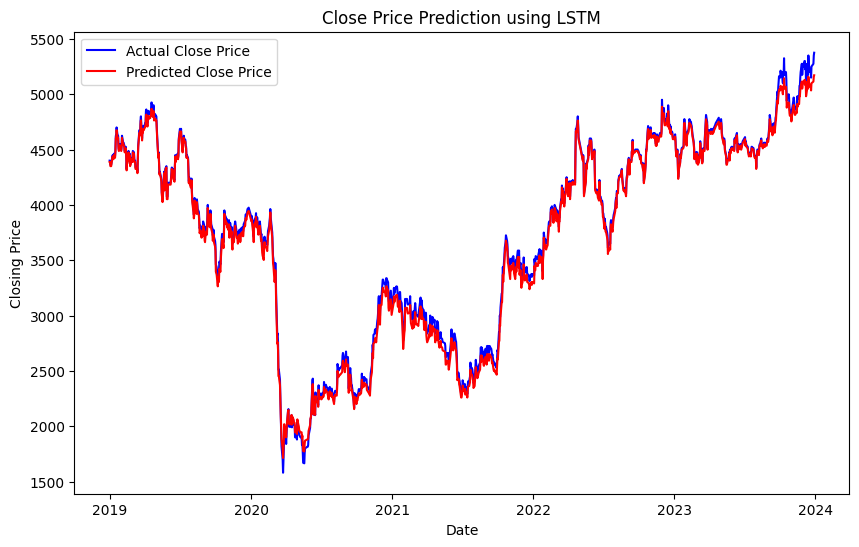

In [ ]:
# Plot the actual closing prices and predictions
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Actual Close Price', color='blue')
plt.plot(df['Date'], df['LSTM Predictions'], label='Predicted Close Price', color='red')
plt.title('Close Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

#### **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# Perform prediction on training data
y_pred = lstm_model.predict(X_train)

# Calculate MSE
mse_lstm = mean_squared_error(Y_train, y_pred)

# Calculating RMSE
rmse_lstm = sqrt(mse_lstm)

# Calculating MAPE
mape_lstm = np.mean(np.abs((Y_train - y_pred) / np.maximum(1e-8, np.abs(Y_train)))) * 100

# Displaying results
print(f'Mean Squared Error (MSE): {mse_lstm}')
print(f'Root Mean Squared Error (RMSE): {rmse_lstm}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_lstm}%')

39/39 [==============================] - 0s 3ms/step
Mean Squared Error (MSE): 0.0001931409760923563
Root Mean Squared Error (RMSE): 0.013897516903834164
Mean Absolute Percentage Error (MAPE): 284452.4871216262%


#### **Saving LSTM Model**

In [ ]:
from keras.models import load_model
lstm_model.save('BBNI_LSTM_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **Gated Recurrent Unit (GRU)**

In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout

#### **Building GRU Architecture**

In [ ]:
# Creating a GRU model
gru_model = Sequential()

# Adding a GRU layer
gru_model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dropout(0.25))
gru_model.add(GRU(units=64, return_sequences=True))
gru_model.add(Dropout(0.25))
gru_model.add(GRU(units=64, return_sequences=True))
gru_model.add(Dropout(0.25))
gru_model.add(GRU(units=64, return_sequences=False))
gru_model.add(Dropout(0.25))
gru_model.add(Dense(units=1))

# Compile the GRU model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

#### **Training GRU Model**

In [ ]:
# Train the GRU model
gru_model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
39/39 [==============================] - 10s 9ms/step - loss: 0.1304
Epoch 2/100
39/39 [==============================] - 0s 8ms/step - loss: 0.0250
Epoch 3/100
39/39 [==============================] - 0s 8ms/step - loss: 0.0084
Epoch 4/100
39/39 [==============================] - 0s 8ms/step - loss: 0.0066
Epoch 5/100
39/39 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 6/100
39/39 [==============================] - 0s 8ms/step - loss: 0.0054
Epoch 7/100
39/39 [==============================] - 0s 8ms/step - loss: 0.0048
Epoch 8/100
39/39 [==============================] - 0s 8ms/step - loss: 0.0045
Epoch 9/100
39/39 [==============================] - 0s 8ms/step - loss: 0.0039
Epoch 10/100
39/39 [==============================] - 0s 8ms/step - loss: 0.0040
Epoch 11/100
39/39 [==============================] - 0s 8ms/step - loss: 0.0034
Epoch 12/100
39/39 [==============================] - 0s 8ms/step - loss: 0.0035
Epoch 13/100
39/39 [================

#### **Testing GRU Model**

In [ ]:
dataset_test = df
real_stock_price = dataset_test.iloc[:,4:5].values
real_stock_price

array([[4400. ],
       [4400. ],
       [4362.5],
       ...,
       [5275. ],
       [5350. ],
       [5375. ]])

In [ ]:
dataset_total = pd.concat((df['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test):].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
inputs

array([[0.743083  ],
       [0.743083  ],
       [0.73320158],
       ...,
       [0.97364954],
       [0.99341238],
       [1.        ]])

In [ ]:
X_test = inputs
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price_gru = gru_model.predict(X_test)
predicted_stock_price_gru = sc.inverse_transform(predicted_stock_price_gru)

39/39 [==============================] - 1s 3ms/step


In [ ]:
predicted_stock_price_gru

array([[4430.03  ],
       [4430.03  ],
       [4392.6187],
       ...,
       [5280.2256],
       [5350.609 ],
       [5373.9683]], dtype=float32)

In [ ]:
# Add the predicted values to the DataFrame
df['GRU Predictions'] = predicted_stock_price_gru

# Print or visualize the results as needed
df[['Date', 'Close', 'GRU Predictions']]

,Date,Close,GRU Predictions
0,2018-12-31,4400.0,4430.029785
1,2019-01-01,4400.0,4430.029785
2,2019-01-02,4362.5,4392.618652
3,2019-01-03,4362.5,4392.618652
4,2019-01-04,4362.5,4392.618652
...,...,...,...
1228,2023-12-21,5150.0,5161.930176
1229,2023-12-22,5250.0,5256.663574
1230,2023-12-27,5275.0,5280.225586
1231,2023-12-28,5350.0,5350.608887


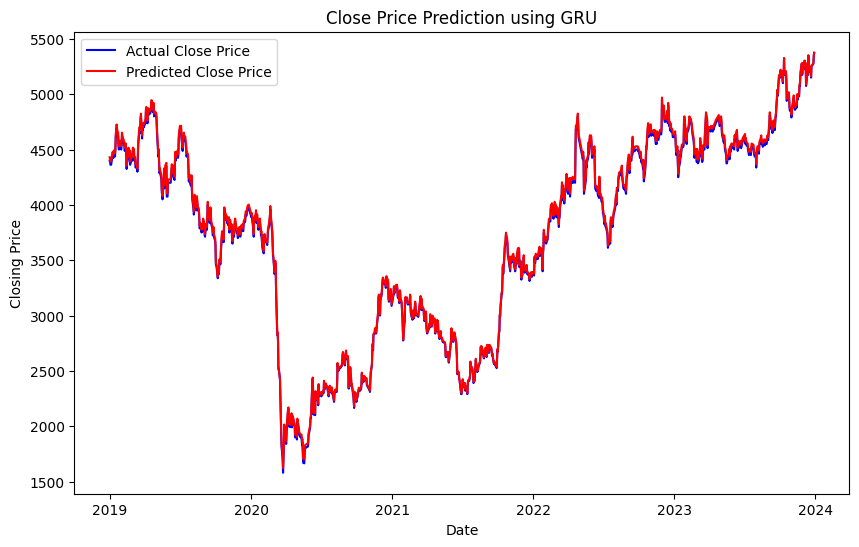

In [ ]:
# Plot the actual closing prices and predictions
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Actual Close Price', color='blue')
plt.plot(df['Date'], df['GRU Predictions'], label='Predicted Close Price', color='red')
plt.title('Close Price Prediction using GRU')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

#### **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# Perform prediction on training data
y_pred = gru_model.predict(X_train)

# Calculate MSE
mse_gru = mean_squared_error(Y_train, y_pred)

# Calculating RMSE
rmse_gru = sqrt(mse_gru)

# Calculating MAPE
mape_gru = np.mean(np.abs((Y_train - y_pred) / np.maximum(1e-8, np.abs(Y_train)))) * 100

# Displaying results
print(f'Mean Squared Error (MSE): {mse_gru}')
print(f'Root Mean Squared Error (RMSE): {rmse_gru}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_gru}%')

39/39 [==============================] - 0s 3ms/step
Mean Squared Error (MSE): 3.723129663873931e-05
Root Mean Squared Error (RMSE): 0.006101745376426266
Mean Absolute Percentage Error (MAPE): 91929.05742049796%


#### **Saving GRU Model**

In [ ]:
from keras.models import load_model
gru_model.save('BBNI_GRU_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Conclusion**

In [ ]:
model_comparison = pd.DataFrame({'Model': ['LSTM','GRU'], 'MSE': [mse_lstm,mse_gru], 'RMSE': [rmse_lstm,rmse_gru], 'MAPE': [mape_lstm*100,mape_gru*100]})
model_comparison

,Model,MSE,RMSE,MAPE
0,LSTM,0.000193,0.013898,2.844525e+07
1,GRU,0.000037,0.006102,9.192906e+06
